# Dimensionality Expansion 
## Kernel Trick
In this notebook, we'll practice processing simulated data and see the benefits of using the **Kernel Trick** to develop non-linear decision boundaries.  

For more information on the Kernel Trick, see these YouTube videos:
* Short explanation with Python: https://youtu.be/Q7vT0--5VII
* Longer lecture with theory: https://youtu.be/as-uwuiu5H8 (part1) and https://youtu.be/dri98k8K0Ys (part2)
* Much longer lecture but very good: https://youtu.be/XUj5JbQihlU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

In [9]:
df = pd.read_excel('CircularData.xlsx', index_col=0)

In [10]:
df.head()

,a1,b1,a2,b2
0,0.987460,0.001312,0.459406,-0.022691
1,1.021924,0.080575,0.530340,0.002727
2,1.026636,0.063435,0.580271,0.072638
3,1.064359,0.128336,0.500014,0.078299
4,0.919217,0.211802,0.516947,-0.011311


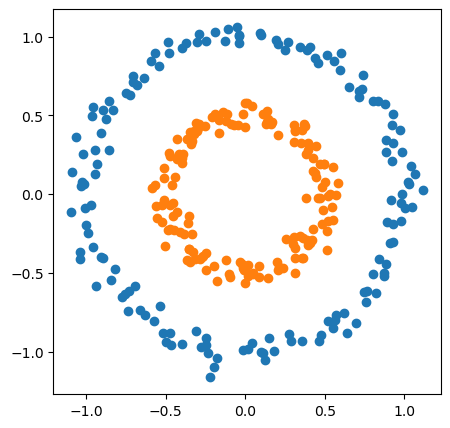

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.a1,df.b1)
ax.scatter(df.a2,df.b2)
plt.show()

In [12]:
# combine a1 and a2, and b1 and b2 into a single variable X.  And then a label y for class 0 and 1.
X0 = np.append(np.array(df.loc[:,'a1']), np.array(df.loc[:,'a2']))
X1 = np.append(np.array(df.loc[:,'b1']), np.array(df.loc[:,'b2']))
X = np.stack((X0,X1),axis=1)

y = np.concatenate((np.zeros((150,1)),np.ones((150,1))))
y = y.ravel()
type(X)
print(X.shape)

(300, 2)


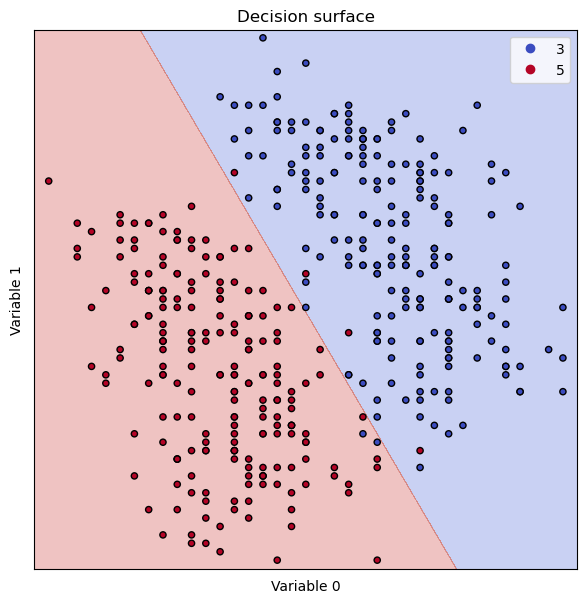

In [5]:
from sklearn import svm
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

plot_contours(clf, X, y)
plt.show()

Clearly here we see that a linear separater from a SVM classifier is not sufficient with just 2 dimensions to classify these points.  Let's try some others.  

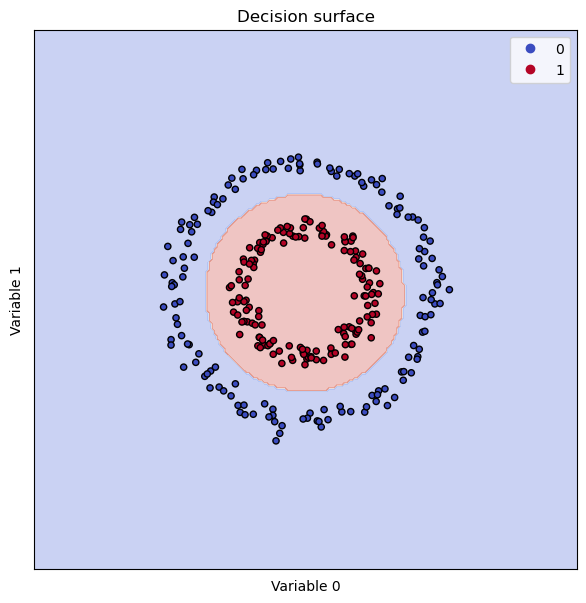

In [7]:
model = svm.SVC(kernel='poly', degree=2)
clf = model.fit(X, y)

plot_contours(clf, X, y)
plt.show()

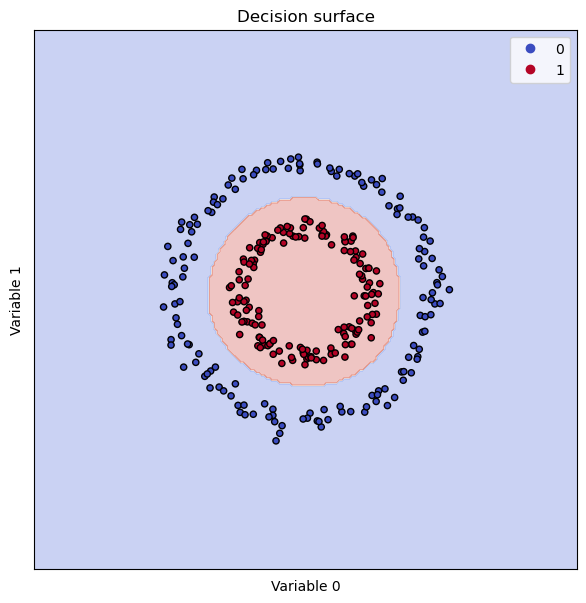

numpy.ndarray

In [8]:
model = svm.SVC(kernel='rbf')
clf = model.fit(X, y)

plot_contours(clf, X, y)
plt.show()
type(X)

## Test with DPA Data
Let's use the DPA data from the last class and see how that looks for 2 classes

In [2]:
X = pd.read_csv("DPA_Data_Small.csv")
y = pd.read_csv("DPA_target.csv", index_col=0)
y = np.array(y).ravel()
print(X.shape)
X = X.loc[(y==3) | (y==5),:]
print(X.shape)
y = y[(y==3) | (y==5)]
print(pd.DataFrame(y).value_counts())
pd.Series(y).value_counts()
print(type(X))

(1000, 59)
(419, 59)
5    210
3    209
dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [3]:
X = np.array(X.iloc[:,[2,3]])
X.shape
#y.shape

(419, 2)

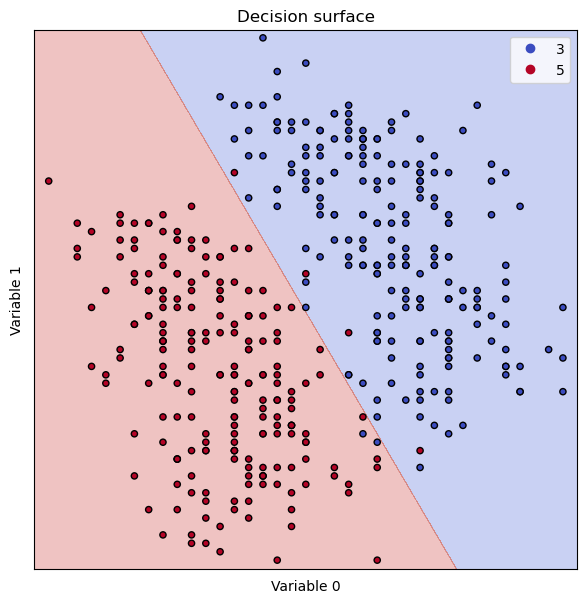

In [7]:
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

plot_contours(clf, X, y)
plt.show()

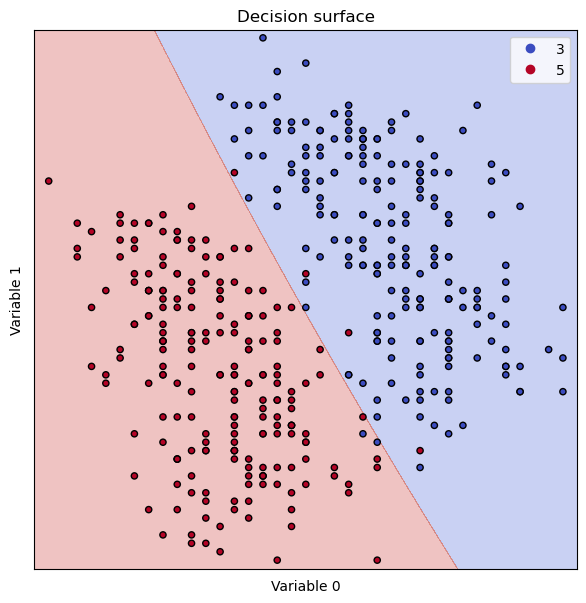

<Figure size 640x480 with 0 Axes>

In [6]:
model = svm.SVC(kernel='poly', degree=2)
clf = model.fit(X, y)

plot_contours(clf, X, y)
plt.show()

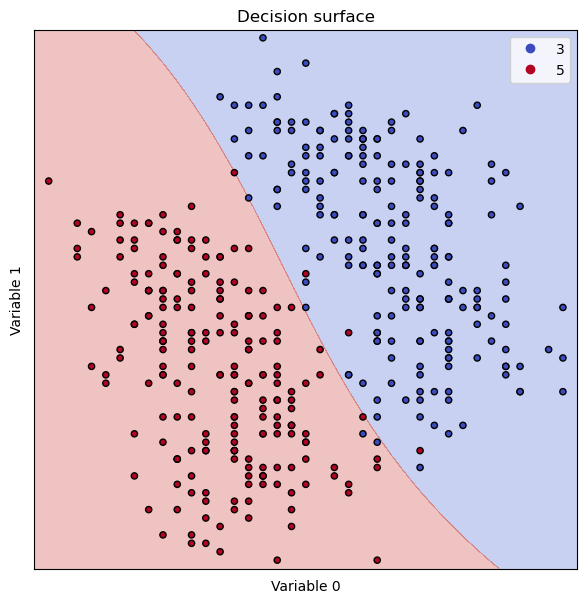

<Figure size 640x480 with 0 Axes>

In [8]:
model = svm.SVC(kernel='poly', degree=3)
clf = model.fit(X, y)

plot_contours(clf, X, y)
plt.savefig('DPA_decision_space.png')
plt.show()